##**Subplots**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.linspace(-1,1,101)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

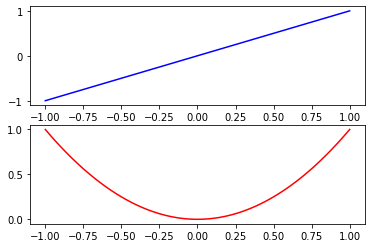

In [ ]:
fig , ax = plt.subplots(2,1)
ax[0].plot(x,y1,color='b')
ax[1].plot(x,y2,color='r')
fig.show()

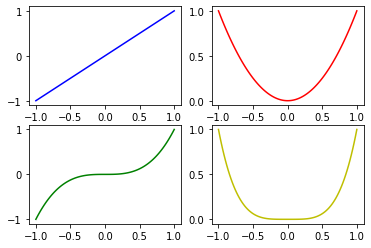

In [ ]:
fig , ax = plt.subplots(2,2)
ax[0,0].plot(x,y1,color='b')
ax[0,1].plot(x,y2,color='r')
ax[1,0].plot(x,y3,color='g')
ax[1,1].plot(x,y4,color='y')
fig.show()

##**CountPlots**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
diamonds = pd.read_csv('/content/diamonds.csv')

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#setting the style
sns.set_style('darkgrid')

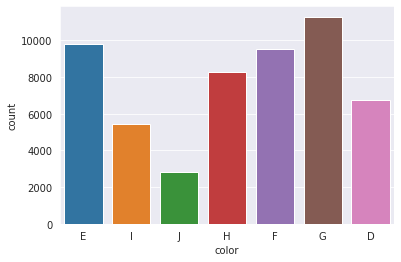

In [ ]:
sns.countplot(x='color' , data=diamonds)

to see the exact number : 

In [ ]:
diamonds.color.value_counts(sort=False)

E     9797
I     5422
J     2808
H     8304
F     9542
G    11292
D     6775
Name: color, dtype: int64

If we want to order the categories : 

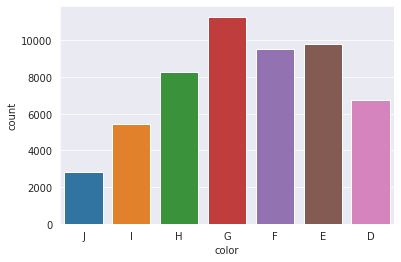

In [ ]:
color_order = ['J' , 'I' , 'H' , 'G' ,'F' , 'E' , 'D']
sns.countplot(x='color' , data=diamonds , order=color_order)

**Order Ascending/Descending**

Descending order : 

In [ ]:
diamonds.color.value_counts().index

Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object')

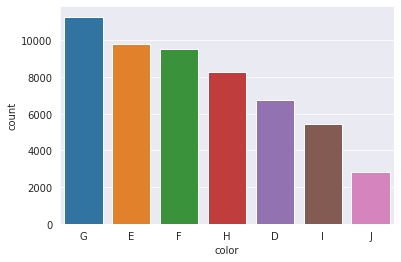

In [ ]:
sns.countplot(x='color' ,data = diamonds , order =diamonds.color.value_counts().index )

Ascending order : 

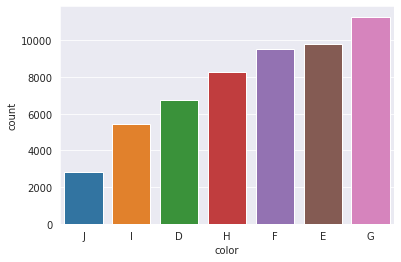

In [ ]:
sns.countplot(x='color' ,data = diamonds , order =diamonds.color.value_counts().index[::-1] )

**Other properties**

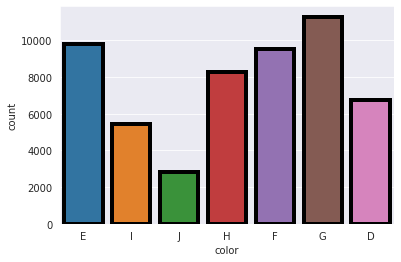

In [ ]:
sns.countplot(x='color' ,data = diamonds , lw=4 , ec='black' )

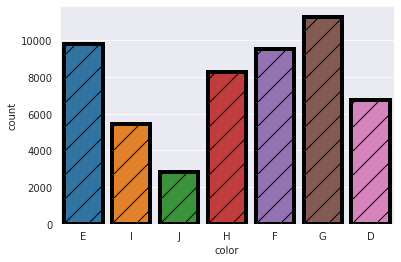

In [ ]:
sns.countplot(x='color' ,data = diamonds , lw=4 , ec='black' , hatch='/');

##**ScatterPlot**

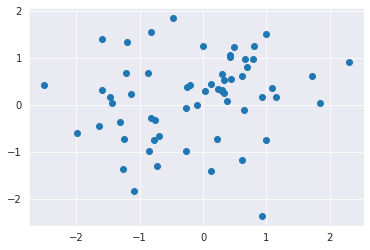

In [ ]:
y1 = np.random.randn(60)
y2 = np.random.randn(60)
#should be the same size 
plt.scatter(y1,y2)
plt.show()

Adjust axis

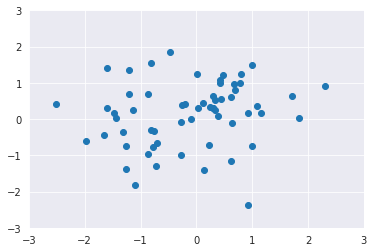

In [ ]:
plt.axis([-3,3,-3,3])  #plt.axis([Xmin,Xmax,Ymin,Ymax])
plt.scatter(y1,y2)
plt.show()

**Plotting 2 different variables on a common axis:** specify a common X-axis and assign separate markers for both

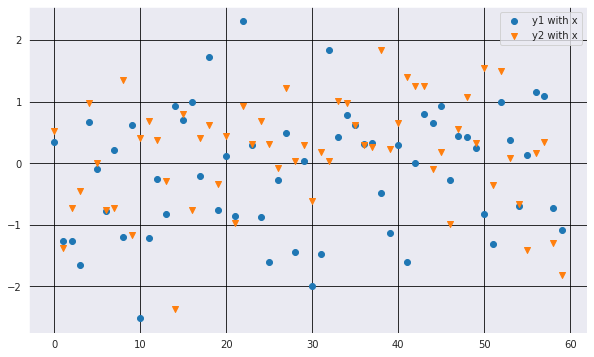

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large 
x = np.arange(60)
plt.scatter(x,y1, marker='o' , label='y1 with x')
plt.scatter(x,y2, marker='v' , label='y2 with x')
plt.legend(loc=1)
plt.grid(True , color='k')  #to make the background lines
plt.show();

to change the color we just enter the parametre **c** 

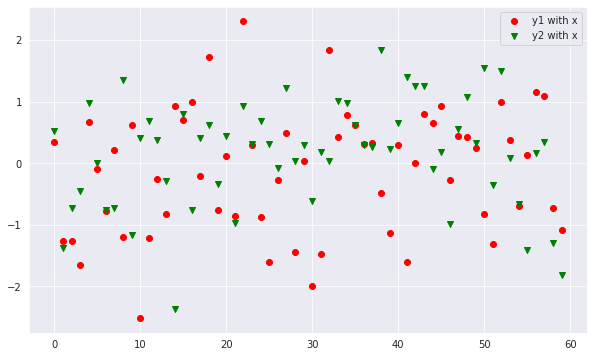

In [ ]:
plt.scatter(x,y1, marker='o' , label='y1 with x', c='r')
plt.scatter(x,y2, marker='v' , label='y2 with x', c='g')
plt.legend(loc='upper right')
plt.show()

##**LinePlot**

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip


--2022-03-31 15:38:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 234.90K   852KB/s    in 0.3s    

2022-03-31 15:38:31 (852 KB/s) - ‘dataset.zip’ saved [240539/240539]



In [ ]:
!unzip dataset.zip


Archive:  dataset.zip
  inflating: dataset.csv             


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()


,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


Do a bit of data cleaning:

-Rename some columns

-Create three new date/time columns for later aggregations

-Filter down to only two garage locations

In [ ]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df.head()


,Location,Capacity,Occupancy,Timestamp
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [ ]:
df['TimeStamp'] = pd.to_datetime(df.Timestamp)
df['Day'] = df.TimeStamp.dt.date
df['Month'] = df.TimeStamp.dt.month
df['Hour'] = df.TimeStamp.dt.hour

In [ ]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]
park.head()

,Location,Capacity,Occupancy,Timestamp,TimeStamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04 09:59:48,2016-10-04,10,9


In [ ]:
months = [pd.datetime(2016, 10, 1), pd.datetime(2016, 11, 1), pd.datetime(2016, 12, 1)];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


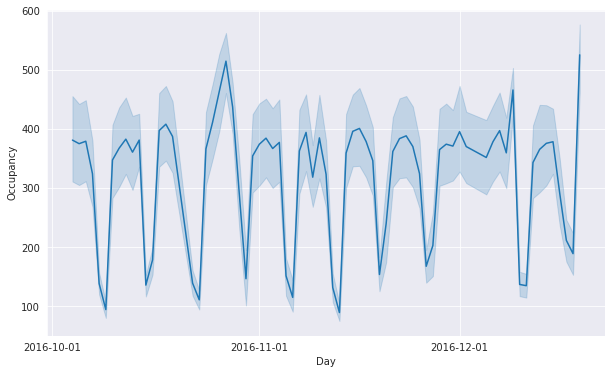

In [ ]:
sns.lineplot(park.Day , park.Occupancy)
plt.xticks(months); #specifying the X-ticks to begin every months

**BootStrapping**

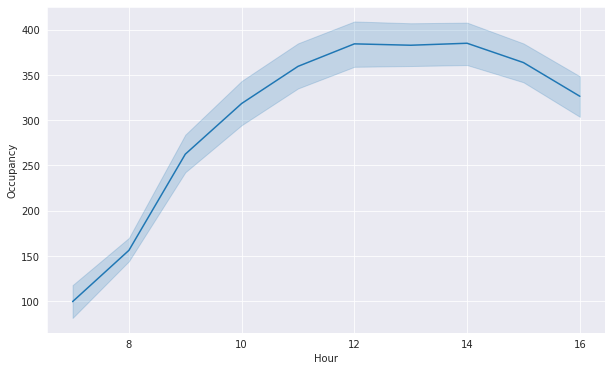

In [ ]:
sns.lineplot(x='Hour' , y='Occupancy' , data=park , n_boot=1000);

**Confidence intervals** : ci

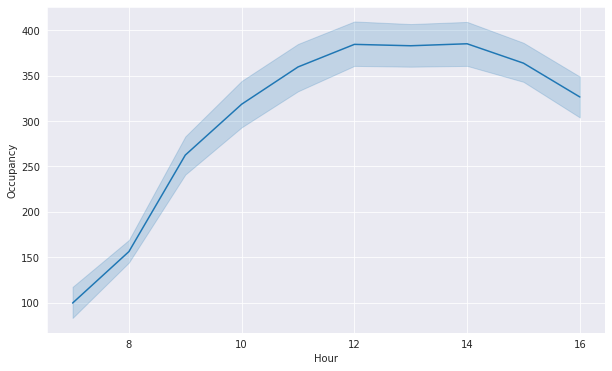

In [ ]:
sns.lineplot(x='Hour' , y='Occupancy' , data=park , ci=95);

**Estimator** : mean or standard deviation(écart type) or sum

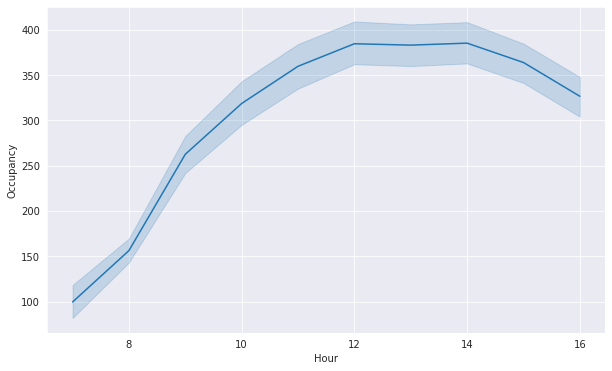

In [ ]:
sns.lineplot(x='Hour' , y='Occupancy' , data=park , estimator='mean');

**Visual sematics**

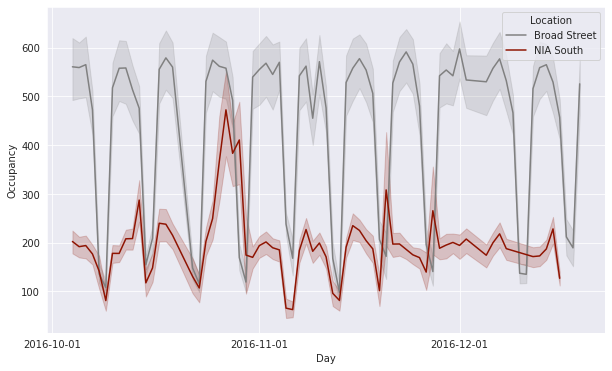

In [ ]:
#color : by parametr palette
sns.lineplot(x='Day', y='Occupancy', data=park, 
             hue='Location',
             palette = ['gray', 'xkcd:brick red']
            )

plt.xticks(months);

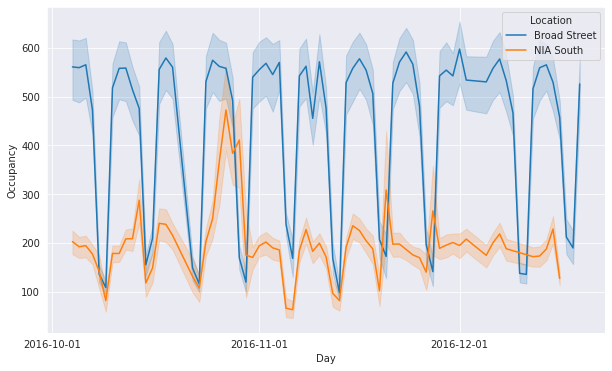

In [ ]:
#hue : to separate lineplots 
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location')

plt.xticks(months);

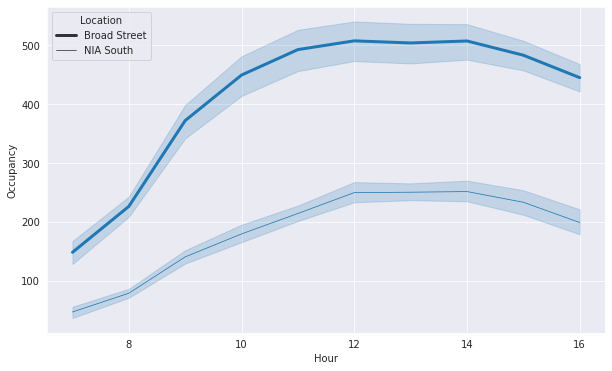

In [ ]:
#size: to an additional info 
sns.lineplot(x='Hour', y='Occupancy', data=park, size='Location',
            );

##**BoxPlot**

In [ ]:
tips = pd.read_csv('/content/tips.csv')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


for 1 variable

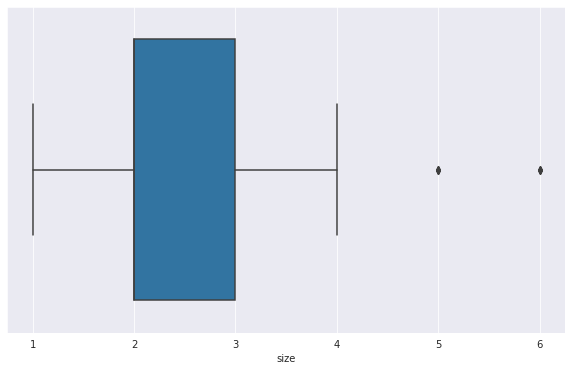

In [ ]:
sns.boxplot(x=tips['size']); 

for 2 variable (one is categorial)

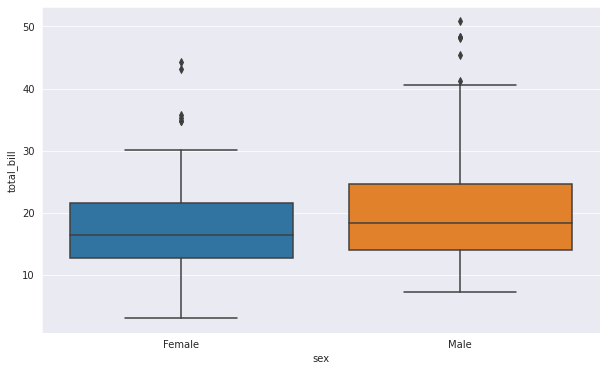

In [ ]:
sns.boxplot(x='sex' , y='total_bill' , data=tips);

Combine BoxPlots with a **hue** to visualize the separate categorial variable

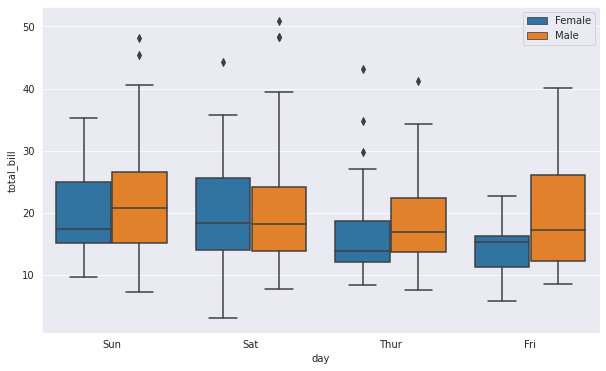

In [ ]:
sns.boxplot(x='day' , y='total_bill' , data=tips , hue='sex')
plt.legend(loc=1);

change color : by the parametre **palette**

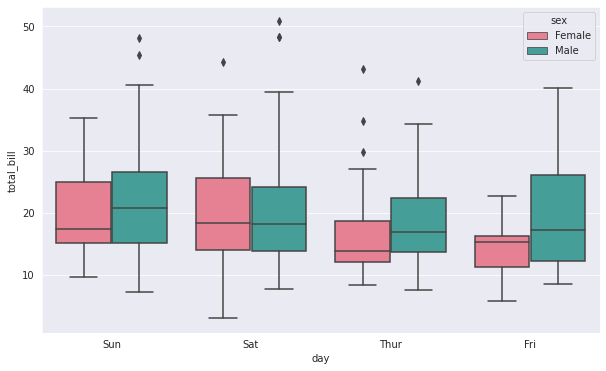

In [ ]:
sns.boxplot(x='day' , y='total_bill' , data=tips , hue='sex',palette='husl');

##**Joint Distribution**

we gonna use 2 dataset : tips and Iris

In [ ]:
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
sns.jointplot(x='total_bill' , y='t')